# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year", infer_datetime_format=True)
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_hu_per_year=sfo_data[["housing_units"]].groupby([sfo_data.index]).mean()
avg_hu_per_year

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [5]:
#Optional challenge: Use the min, max, and std to scale the y limits of the chart.
max_housing_units = sfo_data["housing_units"].max()
min_housing_units = sfo_data["housing_units"].min()
std_housing_units = sfo_data["housing_units"].std()
print(f" max:{max_housing_units}\n"
     f" min:{min_housing_units}\n"
      f" std: {std_housing_units}"
     )

 max:384242
 min:372560
 std: 3823.506872266236


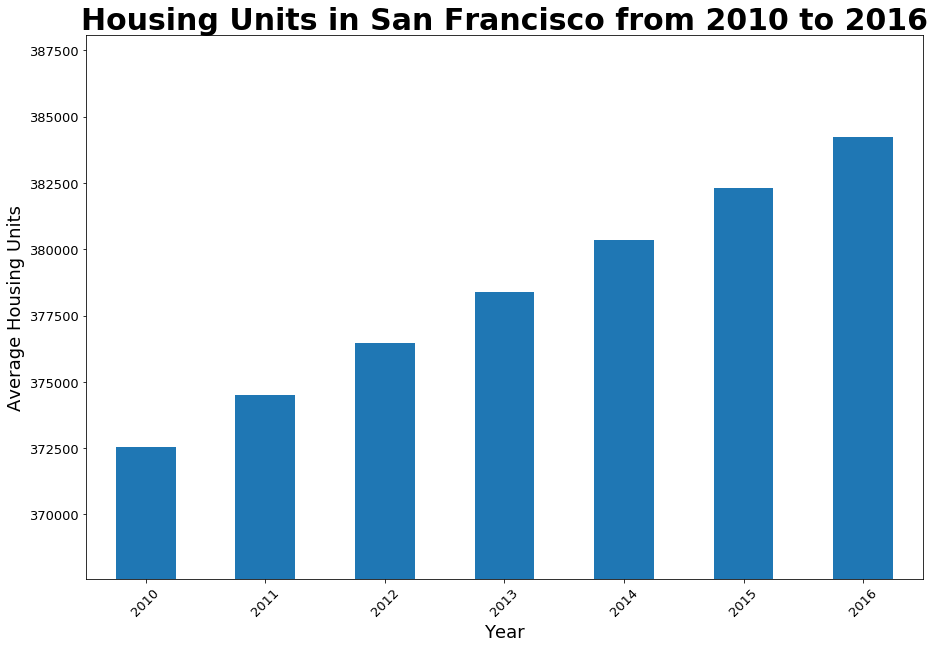

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

fig_housing_units = avg_hu_per_year.plot.bar( 
    title='Housing Units in San Francisco from 2010 to 2016',
    fontsize=13,
    ylim= (min_housing_units-5000, max_housing_units+std_housing_units),
    figsize=(15,10),
    rot=45,
    legend=False,
    )
fig_housing_units.set_xlabel("Year", fontsize=18)
fig_housing_units.set_ylabel("Average Housing Units", fontsize=18)
fig_housing_units.title.set_size(30)
fig_housing_units.title.set_weight("bold")

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [7]:
# Calculate the average gross rent and average sale price per square foot
avg_rent_per_year=sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby([sfo_data.index]).mean()
avg_rent_per_year

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

In [8]:
# Plot the Average Gross Rent per Year as a Line Chart 
min_gross_rent=avg_rent_per_year["gross_rent"].min()
max_gross_rent=avg_rent_per_year["gross_rent"].max()
std_gross_rent=avg_rent_per_year["gross_rent"].std()


fig_gross_rent= avg_rent_per_year.hvplot.line( 
    title = 'Average Gross Rent in San Francisco',
    xlabel = "Year", ylabel = "Gross Rent",
    y='gross_rent',
    ylim= (min_gross_rent, 4500),
    rot=0,
    legend=False,
    ).opts(
    fontsize={'title': 24, 'labels': 15, 'xticks': 12, 'yticks': 12},
    height=700, width=1000,)


fig_gross_rent

:Curve   [year]   (gross_rent)

### Average Sales Price per Year

In [9]:
# Plot the Average Sales Price per Year as a line chart
min_price_sqft = avg_rent_per_year["sale_price_sqr_foot"].min()
max_price_sqft = avg_rent_per_year["sale_price_sqr_foot"].max()

fig_price_sqft = avg_rent_per_year.hvplot.line( 
    title = 'Average Sale Price per Square Foot in San Francisco',
    xlabel = "Year", ylabel = "Avg. Sales Price Per Square Foot",
    fontsize=13,
    y='sale_price_sqr_foot',
    ylim= (min_price_sqft-50, max_price_sqft+50),
    figsize=(15,10),
    rot=0,
    legend=False,
    ).opts(
    fontsize={'title': 24, 'labels': 15, 'xticks': 12, 'yticks': 12},
    height=700, width=1000,)


fig_price_sqft

:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [10]:
import panel as pn
from panel.interact import interact
from panel import widgets

pn.extension()

In [11]:
# Group by year and neighborhood and then create a new dataframe of the mean values
#sfo_data.reset_index(inplace=True)
sfo_data_1 = sfo_data.rename(columns={"neighborhood": "Neighborhood"})

In [12]:
multi_group = round(sfo_data_1.groupby(['year', 'Neighborhood']).mean(), 2)
multi_group.head()

sale_price_sqr_foot  housing_units  gross_rent
year Neighborhood                                                    
2010 Alamo Square                   291.18         372560        1239
     Anza Vista                     267.93         372560        1239
     Bayview                        170.10         372560        1239
     Buena Vista Park               347.39         372560        1239
     Central Richmond               319.03         372560        1239

In [13]:
 # Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
widget_graph = multi_group.hvplot(kind='line', 
                   x='year', y='sale_price_sqr_foot', 
                   groupby='Neighborhood', 
                   widget_location='right',
                   width=1200, height=700, 
                   ylabel='Avg. Sale Price per Square Foot',
                   fontsize={'title': 24, 'labels': 15, 'xticks': 12, 'yticks': 12},               
                  )
widget_graph

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox(css_classes=['widget-box'])
            [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [2] VSpacer()

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [14]:
# Getting the data from the top 10 expensive neighborhoods
sfo_data_largest=round(sfo_data.groupby(['neighborhood']).mean(), 2)
top_10_largest=sfo_data_largest.nlargest(10, 'sale_price_sqr_foot')
top_10_largest

sale_price_sqr_foot  housing_units  gross_rent
neighborhood                                                         
Union Square District               903.99      377427.50     2555.17
Merced Heights                      788.84      380348.00     3414.00
Miraloma Park                       779.81      375967.25     2155.25
Pacific Heights                     689.56      378401.00     2817.29
Westwood Park                       687.09      382295.00     3959.00
Telegraph Hill                      676.51      378401.00     2817.29
Presidio Heights                    675.35      378401.00     2817.29
Cow Hollow                          665.96      378401.00     2817.29
Potrero Hill                        662.01      378401.00     2817.29
South Beach                         650.12      375805.00     2099.00

In [15]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_bar = top_10_largest.hvplot.bar( 
    y="sale_price_sqr_foot",
    title='Top 10 Most Expensive Neighborhoods in SFO',
    xlabel = "Neighborhood", ylabel = "Avg. Sales Price Per Square Foot",
    ylim= (100,1050),
    rot=45,
    legend=False,
    hover_cols=['housing_units', 'gross_rent']
    ).opts(
    fontsize={'title': 30, 'labels': 12, 'xticks': 12, 'yticks': 12},
    height=700, width=1200,
          )
           
           
           
top_10_bar

:Bars   [neighborhood]   (sale_price_sqr_foot,housing_units,gross_rent)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

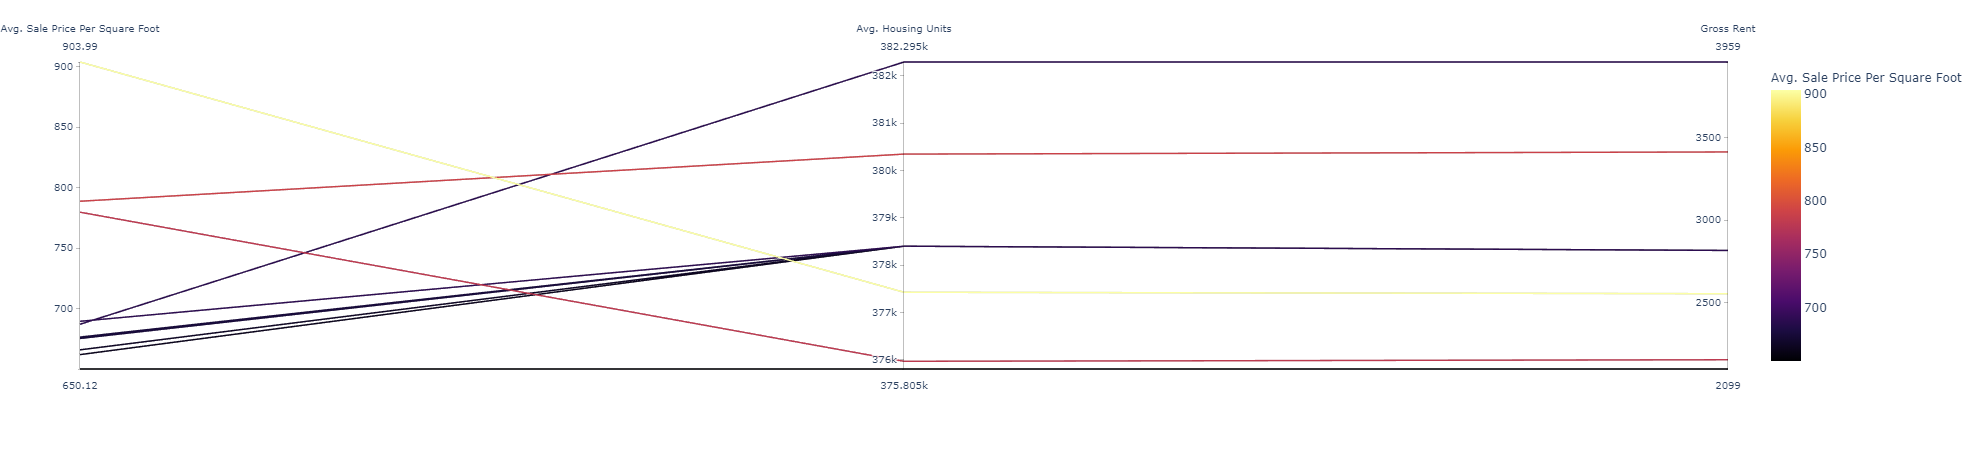

In [16]:
# Parallel Coordinates Plot
parallel_coordinates = px.parallel_coordinates(
    top_10_largest,
    dimensions=[ "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "sale_price_sqr_foot": "Avg. Sale Price Per Square Foot",
        "housing_units": "Avg. Housing Units",
        "gross_rent": "Gross Rent"
    },    
)
parallel_coordinates

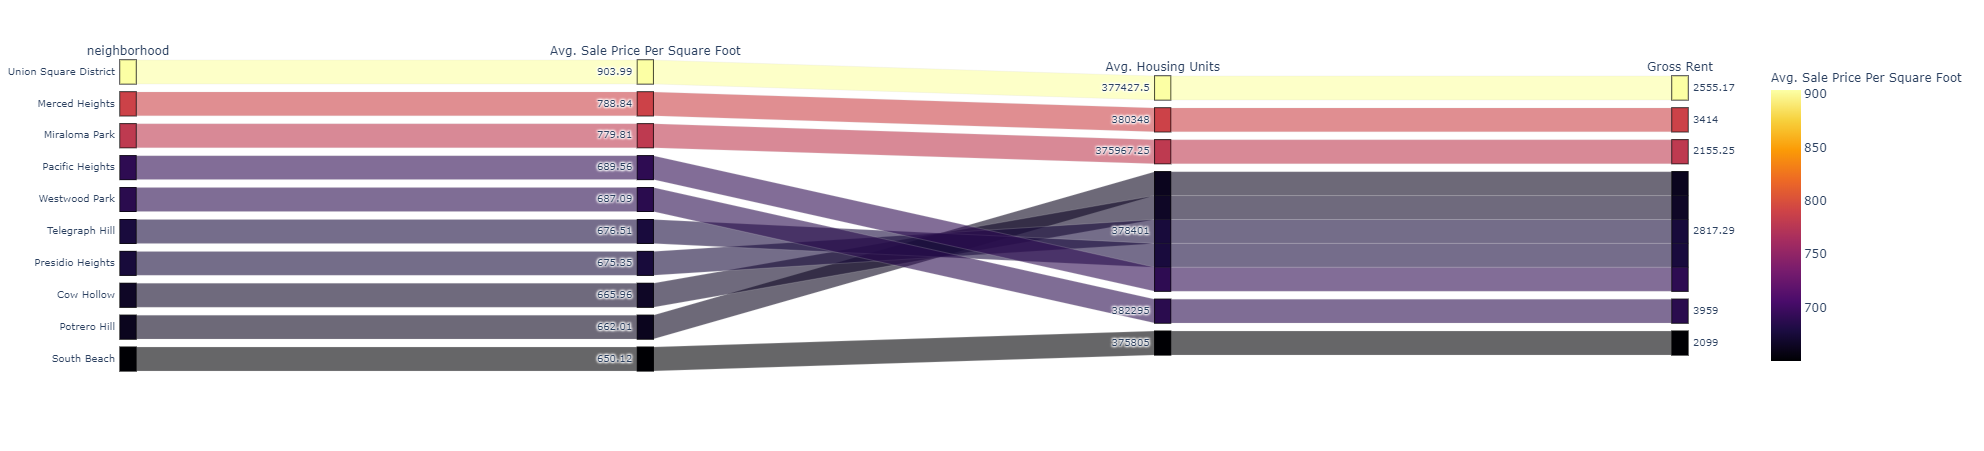

In [17]:
# Parallel Categories Plot
top_10_largest.reset_index(inplace=True)
parallel_categories = px.parallel_categories(
    top_10_largest,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        'index': "Neighborhood",
        "sale_price_sqr_foot": "Avg. Sale Price Per Square Foot",
        "housing_units": "Avg. Housing Units",
        "gross_rent": "Gross Rent"
    },
)
parallel_categories

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [18]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.set_index("Neighborhood", inplace=True)
df_neighborhood_locations.head()

Lat         Lon
Neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050

In [19]:
# Calculate the mean values for each neighborhood 
sfo_data_geo = round(sfo_data_1.groupby('Neighborhood').mean(), 2)
sfo_data_geo.head()

sale_price_sqr_foot  housing_units  gross_rent
Neighborhood                                                   
Alamo Square                  366.02       378401.0     2817.29
Anza Vista                    373.38       379050.0     3031.83
Bayview                       204.59       376454.0     2318.40
Bayview Heights               590.79       382295.0     3739.00
Bernal Heights                576.75       379374.5     3080.33

In [20]:
# Join the average values with the neighborhood locations
joined_geo_df=pd.concat([df_neighborhood_locations, sfo_data_geo], axis='columns', join='inner')
joined_geo_df.reset_index(inplace=True)
joined_geo_df.rename(columns={"gross_rent": "Gross Rent", "sale_price_sqr_foot": "Sale Price Per sqft"}, inplace=True)
joined_geo_df.head()

Neighborhood        Lat         Lon  Sale Price Per sqft  \
0      Alamo Square  37.791012 -122.402100               366.02   
1        Anza Vista  37.779598 -122.443451               373.38   
2           Bayview  37.734670 -122.401060               204.59   
3   Bayview Heights  37.728740 -122.410980               590.79   
4  Buena Vista Park  37.768160 -122.439330               452.68   

   housing_units  Gross Rent  
0       378401.0     2817.29  
1       379050.0     3031.83  
2       376454.0     2318.40  
3       382295.0     3739.00  
4       378076.5     2698.83

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

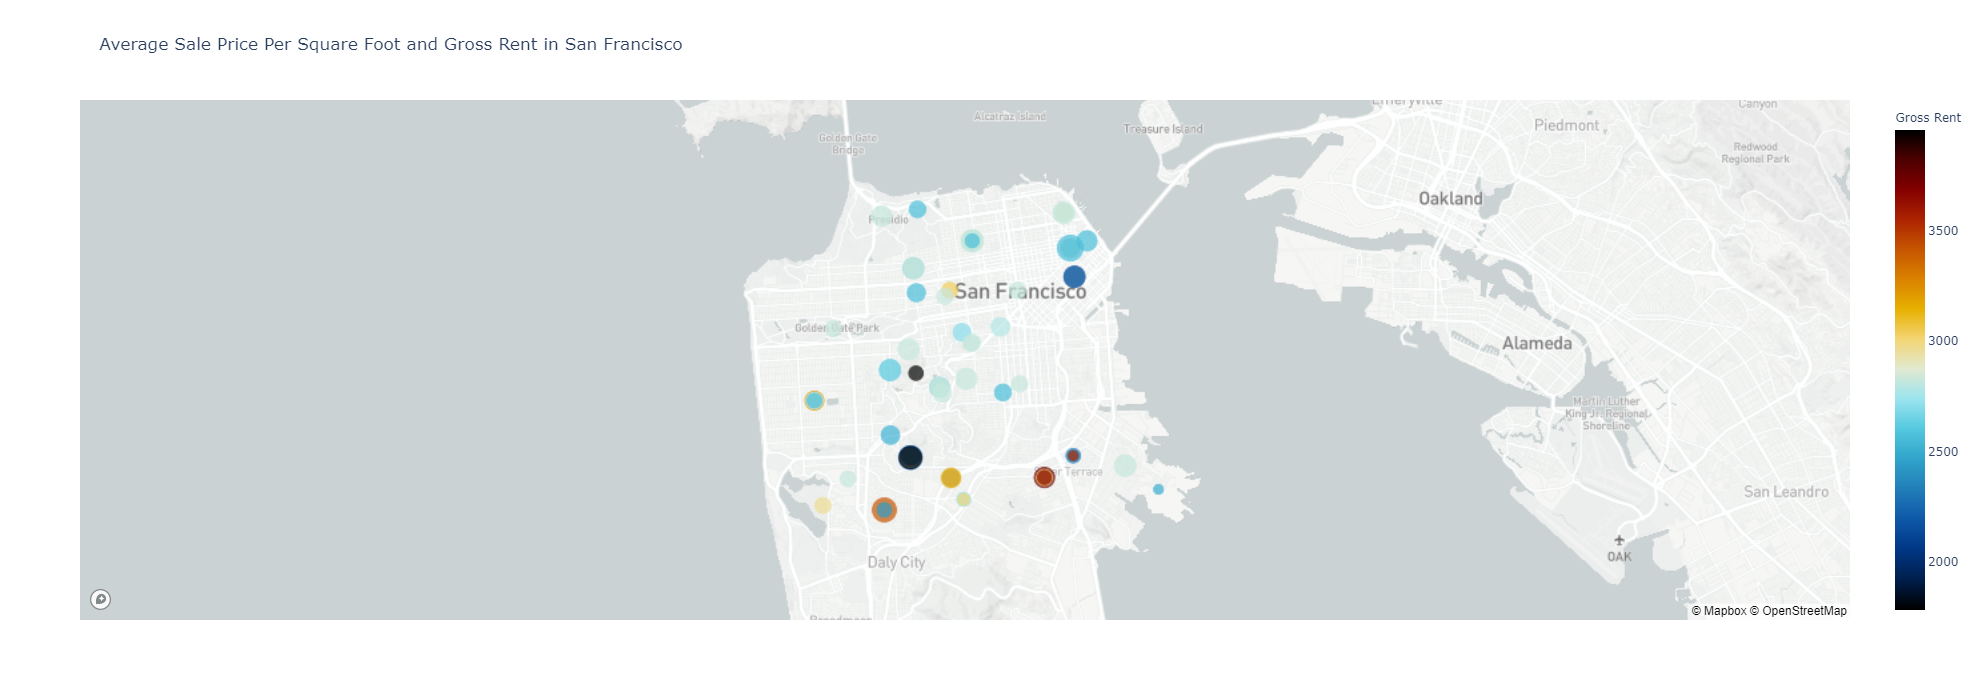

In [21]:
# Create a scatter mapbox to analyze neighborhood info
avg_value_per_neighborhood = px.scatter_mapbox(
    joined_geo_df,
    lat="Lat",
    lon="Lon",
    size="Sale Price Per sqft",
    color="Gross Rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
    zoom=11,
    width=1500,
    height=700,
)
avg_value_per_neighborhood